In [1]:
import yaml

with open("config.yaml", "r") as c:
    try:
        cfg = yaml.safe_load(c)
    except yaml.YAMLError as exc:
        print(exc)

print(cfg)

{'batch_size': 16, 'epochs': 20, 'learning_rate': 0.0003}


In [2]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [3]:
from torch.utils.data import DataLoader
from utils.data_util import HousingPriceDataset

training_data = HousingPriceDataset(csv_file='housing_price_dataset.csv', train=True)
test_data = HousingPriceDataset(csv_file='housing_price_dataset.csv', train=False)
train_dataloader = DataLoader(training_data, batch_size=cfg['batch_size'], shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=cfg['batch_size'], shuffle=True)

In [4]:
import torch.nn as nn
from utils.nn_util import NeuralNetwork, train, test

model = NeuralNetwork().to(device)
loss_fn = nn.HuberLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=cfg['learning_rate'])
train_losses, test_losses = [], []

for e in range(cfg['epochs']):
    train_losses.append(
        train(train_dataloader, model, loss_fn, optimizer, device)
    )
    test_losses.append(
        test(test_dataloader, model, loss_fn, device)
    )
    print(f"Epoch {e+1}: avg train loss: {train_losses[-1]:>8f}, avg test loss: {test_losses[-1]:>8f}")

Epoch 1: avg train loss: 0.432478, avg test loss: 0.437779
Epoch 2: avg train loss: 0.429061, avg test loss: 0.433118
Epoch 3: avg train loss: 0.424782, avg test loss: 0.426790
Epoch 4: avg train loss: 0.418670, avg test loss: 0.417785
Epoch 5: avg train loss: 0.409190, avg test loss: 0.403268
Epoch 6: avg train loss: 0.394000, avg test loss: 0.380236
Epoch 7: avg train loss: 0.368017, avg test loss: 0.342323
Epoch 8: avg train loss: 0.326900, avg test loss: 0.287337
Epoch 9: avg train loss: 0.278524, avg test loss: 0.239238
Epoch 10: avg train loss: 0.247413, avg test loss: 0.218559
Epoch 11: avg train loss: 0.236611, avg test loss: 0.213834
Epoch 12: avg train loss: 0.234788, avg test loss: 0.212411
Epoch 13: avg train loss: 0.233006, avg test loss: 0.211128
Epoch 14: avg train loss: 0.231317, avg test loss: 0.210758
Epoch 15: avg train loss: 0.231305, avg test loss: 0.210268
Epoch 16: avg train loss: 0.230638, avg test loss: 0.210098
Epoch 17: avg train loss: 0.229207, avg test loss

/Users/hs/miniforge3/envs/LearningPyTorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hs/miniforge3/envs/LearningPyTorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hs/miniforge3/envs/LearningPyTorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hs/miniforge3/envs/LearningPyTorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

Text(0.5, 1.0, 'Train Loss vs Test Loss')

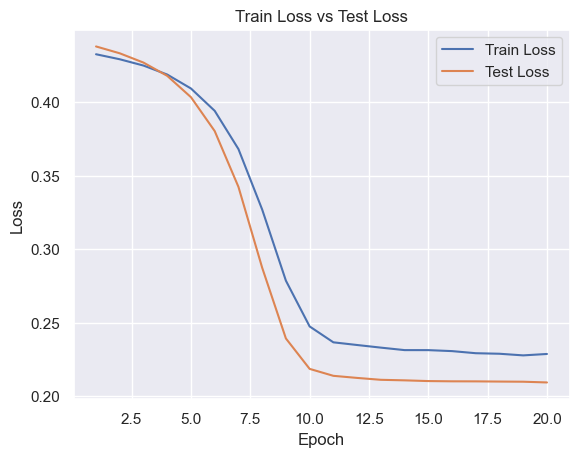

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

f, ax = plt.subplots()
sns.lineplot(
    x=range(1, cfg['epochs']+1),
    y=train_losses,
    ax=ax,
    label='Train Loss'
)
sns.lineplot(
    x=range(1, cfg['epochs']+1),
    y=test_losses,
    ax=ax,
    label='Test Loss'
)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Loss vs Test Loss')